In [30]:
"""LiuKatrina_01.ipynb Harvard MCB 112 Problem Set 01 submitted by Xiao (Katrina) Liu"""
__author__      = "Katrina Liu"
__email__ = "xliu@hms.harvard.edu"
__date__ = "Sep 7, 2022"

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import copy

## Exercise 1

We begin by constructing functions to parse the gene table files:

In [32]:
def parse_gene_table(filename):
    """
    Helper function parse the data retrieved from path filename
    :param filename: file path of the dataset
    :return: a dictionary where key is gene names and values are feature values from data
    """
    # code modified from http://mcb112.org/w01/figure1.py
    tpmdata    = {}                      
    for line in open(filename):
        if line[0] == '#': continue     
        line   = line.rstrip('\n')      
        fields = line.split()           
        tpmdata[fields[0]] = [float(s) for s in fields[1:]]
    
    return tpmdata

Then we read the two given tables. Iterate through all keys from Moriaty's table and search in the Alder's table's key to find all different keys.

In [33]:
# Retrieve information from the two data tables
moriaty_tab = parse_gene_table("Moriarty_SuppTable1")
adler_tab = parse_gene_table("Adler_SuppTable2")

missed_keys = [] # Store missed keys
# Iterate through keys in Moriaty's table to see if they are in Adler's table
for mkey in moriaty_tab.keys():
    if mkey not in adler_tab.keys():
        missed_keys.append(mkey)

print(missed_keys)

['15-Sep', '2-Mar', '1-Mar', '10-Sep', '7-Mar', '4-Mar', '2-Sep', '11-Sep', '6-Mar', '11-Mar', '3-Mar', '8-Sep', '7-Sep', '14-Sep', '6-Sep', '1-Dec', '8-Mar', '5-Mar', '9-Mar', '12-Sep', '1-Sep', '4-Sep', '10-Mar', '9-Sep', '5-Sep', '3-Sep']


### Analysis
Looking at the produced results of missing keys presented in Moriaty's table, we can see that the missing gene names only contains date information. This potentially could be an error when exporting data from Excel where Excel corrupts the data and modifies the gene names into the dates of collection or some other related date information.

## Exercise 2

For each of the attributes, we proceed with the following procedure: find the gene names and variables and stored them as a list of tuples; sort the list based on the variables; pick the genes from the sorted list.

In [34]:
# Retrieve the top five genes with the highest mRNA synthesis rates
synth_rate_list = [(gene_name, val[0]) for gene_name, val in adler_tab.items()]
synth_rate_sorted = sorted(synth_rate_list, key=lambda x:x[1], reverse=True)
synth_rate_sorted_genes = [val[0] for val in synth_rate_sorted]
print(synth_rate_sorted_genes[:5])


['CCDC169-SOHLH2', 'DDX60L', 'LRRK1', 'SLC25A45', 'FARP1']


In [35]:
# Retrieve the top five genes with the longest mRNA halflife
halflife_list = [(gene_name, val[1]) for gene_name, val in adler_tab.items()]
halflife_sorted = sorted(halflife_list, key=lambda x:x[1], reverse=True)
halflife_sorted_genes = [val[0] for val in halflife_sorted]
print(halflife_sorted_genes[:5])

['TFRC', 'SPINK8', 'DIRC1', 'PLA1A', 'SAMSN1']


In [36]:
# Retrieve the top five genes with thethe highest ratio of expression
# at t=96 hours post-mortem vs. t=0 
exp_ratio_96_0 = [(gene_name, val[4]/val[0]) for gene_name, val in moriaty_tab.items()]
exp_ratio_96_0_sorted = sorted(exp_ratio_96_0, key=lambda x:x[1], reverse=True)
exp_ratio_96_0_sorted_genes = [val[0] for val in exp_ratio_96_0_sorted]
print(exp_ratio_96_0_sorted_genes[:5])

['TFRC', 'SPINK8', 'DIRC1', 'PLA1A', 'RSPRY1']


## Exercise 3

Lastly, we construct functions to merge the gene tables and output gene tables to a file.

In [37]:
def merge_gene_tab(tab1, tab2):
    """
    Merge two gene tables into one where only shared gene names are included 
    along with concatenated features where features of table tab1 is followed 
    by the features of table tab2
    :param tab1: the first gene table
    :param tab2: the second gene table
    :return: a table containing shared genes name of tab1 and tab2 and features
    of tab1 and tab2
    """
    output_tab = {}
    for gene_name in tab1.keys():
        if gene_name in tab2.keys():
            output_tab[gene_name] = copy.copy(tab1[gene_name])
            output_tab[gene_name].extend(tab2[gene_name])
    return output_tab

def output_gene_tab(tab, output_filename, headers=None):
    """
    Output the information of a gene table into the designated output file path
    :param tab: a gene table
    :param output_filename: the output file path to store information of 
    the gene table
    :param headers: a list of header strings to be stored in header row
    """
    f = open(output_filename, "w")
    # Write header row if headers is given
    if headers is not None:
        f.write("# gene_name "+" ".join(headers)+"\n")
    for gene in tab.keys():
        f.write(gene+" "+" ".join(map(str, tab[gene]))+"\n")
    f.close()

In [38]:
# Create the expression ratio table
expr_ratio_tab = {}
for gene in moriaty_tab.keys():
    exprs = moriaty_tab[gene]
    expr_ratio_tab[gene] = [exprs[1]/exprs[0],exprs[2]/exprs[0],
                            exprs[3]/exprs[0],exprs[4]/exprs[0]]
    
merged_tab = merge_gene_tab(expr_ratio_tab,adler_tab) # Merge the two tables
# Output the merged table
output_gene_tab(merged_tab, "Merged_Table", 
                headers=["12h/0h","24h/0h","48h/0h","96h/0h","synth_rate",
                         "halflife"])

### Exploring Data and Analysis
From the results I extracted from exercise 2, I noticed that the genes with higher expression ratios also in the group of genes with higher half life. By plotting the expression ratios against half lives, we can see the following resulting plot:

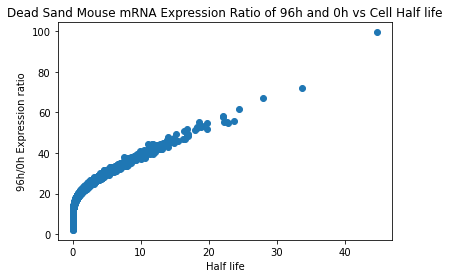

In [39]:
import matplotlib.pyplot as plt

expr_ratio_96 = [val[3] for val in merged_tab.values()]
halflife = [val[5] for val in merged_tab.values()]
plt.figure()
plt.scatter(expr_ratio_96,halflife)
plt.xlabel("Half life")
plt.ylabel("96h/0h Expression ratio")
plt.title("Dead Sand Mouse mRNA Expression Ratio of 96h and 0h vs Cell Half life")
plt.show()


The plot confirms our idea of the longer the half life of the cell is, the higher the expression ration is. Also, the plot seems to demonstrate a logrithmic relation in between. Considering the mRNA level at steady state, the synthesis rate and decay rate are fixed. However, since the cells are dying, the synthesis rate will gradually decrease to zero, so that at 96h, the expression rate is only related to the decay rate. Therefore, we are able to explain this association.

However, the reason of the increase of the expressions level might be TPM are calculated in a normalized way, where it only represents the normalized expressions. Therefore, it is possible that with the total number of mapped counts decreasing and the total cell number decreasing, the expression increased by cell number decreasing at a higher rate. 